In [ ]:
# Notebook for converting EIS data to common frequency and then to images

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.preprocessing import LabelEncoder
import json

from eis_preprocessing import preprocess_data

In [2]:
d_path = './data/'
df = preprocess_data(d_path + "train_data_newspl.csv")
df_test = preprocess_data(d_path + "test_data_newspl.csv")

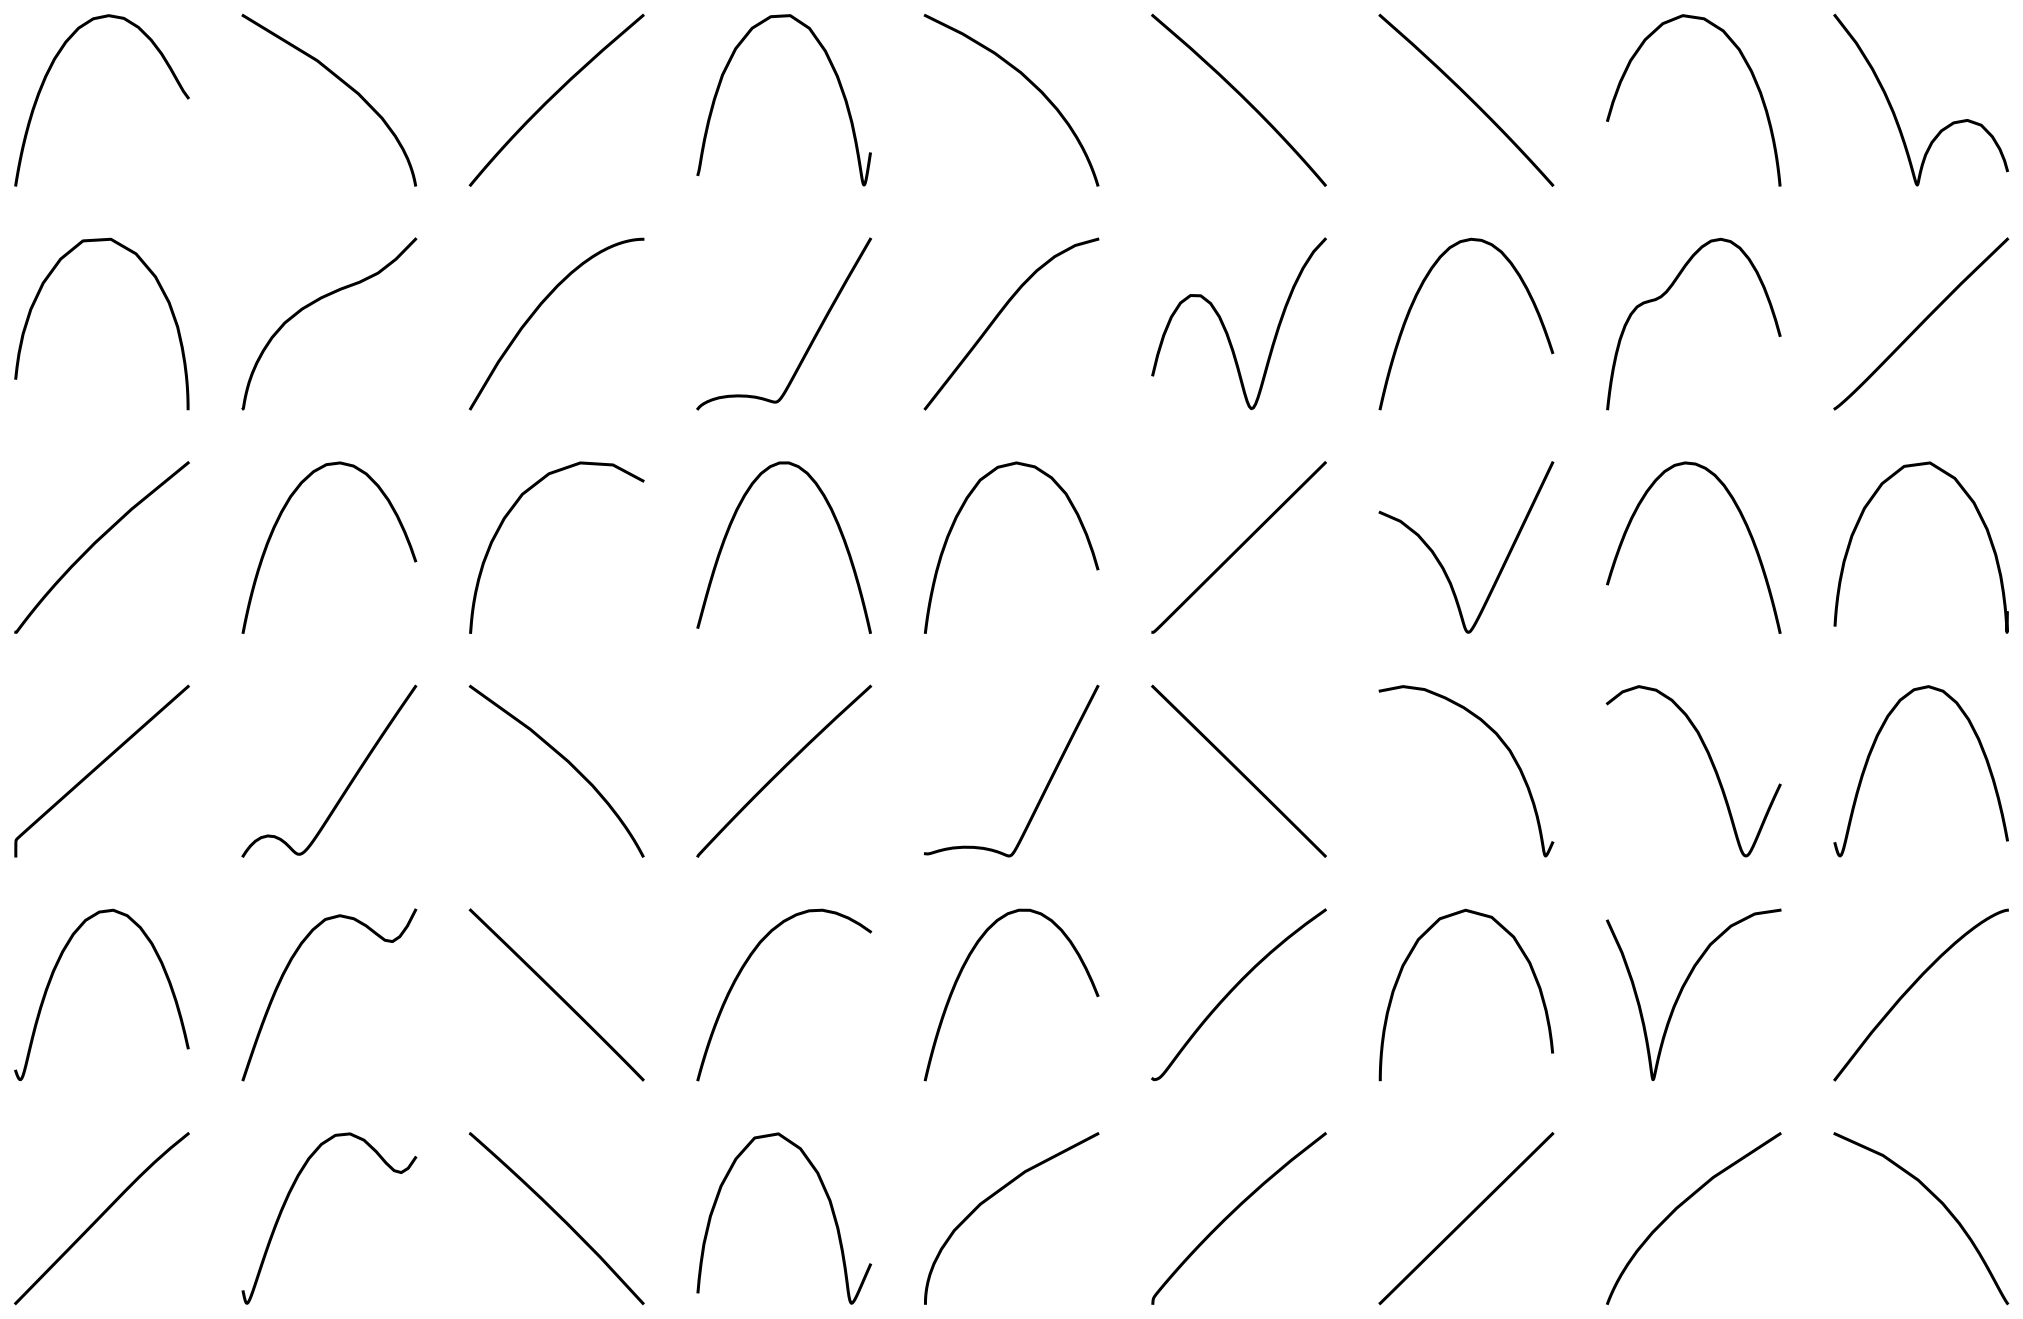

In [6]:
# Now use the common frequency for all the data 
# and convert to images. Usable coloumns are zreal and zimag

# First, let's make some plots of the data
# Plot the real part of the impedance
rows = 6 
cols = 9 
fig, axs = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=(4*cols, 4*rows), frameon=False)
for i in range(rows):
    if i == 0:
        axs[i, 0].set_ylabel("zreal")
    for j in range(cols):
        axs[i, j].set_axis_off()
        axs[i, j].plot(df['zreal'][i*cols+j], -df['zimag'][i*cols+j], linewidth=3, color='black')

axs[i, j].set_xlabel('Frequency (Hz)')
fig.savefig('figures/eis_art.eps')
fig.savefig('figures/eis_art.pdf')
plt.show()

    

In [ ]:
# Changes: No points, but rather feed an line
# Forget about the frequency for now. 
# Keep it black and white for now.

# Other ideas: 
# - Use the frequency as a colour
# - Extract features with CNN and feed scale + featues to a NN.
# - Skip the common frequency basis and use whatever frequencies are given

In [49]:
le_f = 'models/labels.json'
# Load label encoder
with open(le_f, 'r') as f:
    mapping = json.load(f)
    le = LabelEncoder()

nb_classes = len(mapping.keys())
mapping['classes'] = [mapping[str(int(i))] for i in range(nb_classes)]
le.classes_ = np.array(mapping['classes'])

In [75]:
def plot_eis_nyquist_individual(df: pd.DataFrame, name='train'):
    """Plot the nyquist diagram for all eis data in the dataframe"""
    
    nb_spectra = len(df)
    # nb_spectra = 1 
    for i in range(nb_spectra):
        fig, ax  = plt.subplots(figsize = (2, 2), dpi=64, frameon=False)

        ax.set_axis_off()
        ax.plot(df['zreal'][i], -df['zimag'][i], linewidth=3, color='black')

        # Approach to encode the frequency as a colour
        # real=df['zreal'][i]
        # imag=df['zimag'][i]
        # real_minmaxed = (real-np.min(real))/(np.max(real)-np.min(real))
        # imag_minmaxed = (imag-np.min(imag))/(np.max(imag)-np.min(imag))
        # plt.scatter(real_minmaxed, -imag_minmaxed,c=freq, cmap="viridis",norm=colors.LogNorm(vmin=10, vmax=100000))
        plt.tight_layout()
        try:
            plt.savefig(f'./images/{name}/{df["Circuit"][i]}/{i}.png', dpi=64, bbox_inches='tight', pad_inches=0)
        except:
            os.makedirs(f'./images/{name}/{df["Circuit"][i]}')
            plt.savefig(f'./images/{name}/{df["Circuit"][i]}/{i}.png', dpi=64, bbox_inches='tight', pad_inches=0)
        plt.close()
        if np.mod(i, 100) == 0:
            print(f'Processed {i} spectra out of {nb_spectra}')
        #plt.savefig(f'./{s.Circuit}/fig{i}', dpi=64)
        #plt.show()
        

In [76]:
# Now let's make the images
plot_eis_nyquist_individual(df, name='train')
plot_eis_nyquist_individual(df_test, name='test')

Processed 0 spectra out of 1865
Processed 100 spectra out of 1865
Processed 200 spectra out of 1865
Processed 300 spectra out of 1865
Processed 400 spectra out of 1865
Processed 500 spectra out of 1865
Processed 600 spectra out of 1865
Processed 700 spectra out of 1865
Processed 800 spectra out of 1865
Processed 900 spectra out of 1865
Processed 1000 spectra out of 1865
Processed 1100 spectra out of 1865
Processed 1200 spectra out of 1865
Processed 1300 spectra out of 1865
Processed 1400 spectra out of 1865
Processed 1500 spectra out of 1865
Processed 1600 spectra out of 1865
Processed 1700 spectra out of 1865
Processed 1800 spectra out of 1865


image size:  (108, 108, 3)


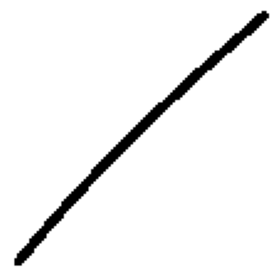

In [84]:
DATADIR ="./images/train/"
for key in mapping: 
    path = os.path.join(DATADIR, mapping[key])
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_ANYCOLOR)
        print('image size: ', img_array.shape)
        #fig, ax = plt.subplots(figsize = (2, 2), dpi=64, frameon=False)
        plt.imshow(img_array, cmap="gray")
        # axis off
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        break
    break